# Introduction to Natural Language Processing in Python
## Autor: Borja Esteve
Este módulo del curso se centra en aprender los conceptos básicos de NLP tales como:


*   Identificación de temas
*   Clasificación de textos
*   ...


## **1. Regular Expressions**
Las expresiones regulares son cadenas que puede usar y que tienen una sintaxis especial, que te permite hacer coincidir patrones y encontrar otras cadenas.

Un patrón es una serie de letras o símbolos que pueden corresponder a un texto, palabras o puntuación reales.

Se pueden usar expresiones regulares para hacer cosas como buscar enlaces en una web, analizar direcciones de correo electrónico o eliminar cadenas o carácteres no deseados.  

Estas expresioens regulares pueden usarse fácilmente con la biblioteca de Python `re`

Podemos hacer coincidir una subcadena con el método de coincidencia que hace coincidir un patrón con una cadena:

In [ ]:
import re
re.match('abc', 'abcdef')

<re.Match object; span=(0, 3), match='abc'>

Este método toma como primer aqrgumento el patrón, la cadena como el segundo y devuelve un objeto de coincidencia. Aquí vemos que coincidió exactamente con lo que esperábamos: abc.

También podemos usar patrones especiales que regex enteinda, como `'\w+'` el cual coincidirá con una palabra.

In [ ]:
word_regex = '\w+'
re.match(word_regex, 'hi there!')

<re.Match object; span=(0, 2), match='hi'>

Podemos ver aquí a través de la representación del objeto de coincidencia que ha coincidido con la primera palabra que encontró: hi

| pattern | matches | examples |
|-----------|-----------|-----------|
| \w+ | word | 'Magic' |
| \d | digit | 9 |
| \s | space | ' ' |
| .* | wildcard | 'username74' |
| + or * | greedy match | 'aaaaaa' |
| \S | not space | 'no_spaces' |
| [a-z] | lowercase group | 'abcdefg |

Algunas funciones de la librería que utilizaremos en el módulo serán:

* `split`: parte un string en un regex
* `findall`: busca todos los patrones en un string
* `search`: busca un patrón
* `match`: *matchea* un string entero o un substring en base a un patrón

Vamos con un ejercicio:


In [ ]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


## **Introducción a la tokenización**
La tokenización es el proceso de transformar una cadena o documento en fragmentos más pequeños, a los que llamamos tokens.

Este suele ser un paso en el proceso de preparación de un texto para el procesamiento del lenguaje natural.

La tokenización hará cosas como romper palabras u oraciones, separar las puntuaciones o incluso se puede tokenizar partes de una cadena, como separar todos los hashtags en un Tweet.

Una librería que se usa comúnmente para la tokenización simple es `NLTK`.

A continuación puede verse un breve ejemplo del uso del método `word_tokenize`para dividir una cadena en tokens:

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
word_tokenize("Hi there!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hi', 'there', '!']

Podemos ver en el resultado que las palabras están separadas y la puntuación también son tokens individuales.

**¿Por qué es necesario tokenizar?**

Por que puede ayudarnos con algunas tareas simples de procesamiento de texto, como mapear parte del discurso, hacer coincidir palabras comunes o repetidas o eliminar tokens que no queremos.

Existen diferentes tipos de tokenizadores en la librería `NLTK`:

* `sent_tokenize`: Tokeniza un documento en frases.
* `regexp_tokenize`: Tokeniza un string o documento basándose en patrones de expresiones regulares.
* `TweetTokenizer`: Es una clase especial para tokenizar únicamente Tweets, permitiéndote separar por hashtags, menciones y otras características.

También se aprende como usar regex para analizar los tokens. Algo importante es diferenciar entre cuando usar `re.search()`y `re.match()`:



In [ ]:
import re
print(re.match('abc', 'abcde'))
print(re.search('abc','abcde'))

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 3), match='abc'>


In [ ]:
print(f'El método match da: {re.match("cd","abcde")}')
print(re.search('cd', 'abcde'))

El método match da: None
<re.Match object; span=(2, 4), match='cd'>


Como vemos, el método `match`no puede buscar patrones en medio de cadenas. Esto se debe a que `match`intentará hacer coincidir una cadena desde el principio hasta que ya no pueda coincidir. La búsqueda pasará por TODA la cadena para buscar opciones de coincidencia.

Si necesitas encontrar un patrón que podría no estar al comienzo de la cadena, deberías usar el método `search()`.

Si deseas ser específico acerca de la composición de todo la cadena o al menos el patrón incial, entonces deberías usar `match()`.

Vamos con un ejercicio:

In [ ]:
# Import necessary modules
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

"""La variable scene_one contiene el guión de una película de los Monty Python. Ejercicio realizado en el entorno de DataCamp"""

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)


In [ ]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

In [ ]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

In [ ]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

### Tokenización avanzada con regex

Un nuevo patrón de expresiones regulares que será útil para la tokenización avanzada es el método OR. En regex, este método se representa usando `|`.

Para usarlo, se puede definir un grupo usando `()`. Los grupos pueden ser un patrón o un conjunto de caracteres que desee hacer coincidir.

También se puede definir clases de caracteres explícitos mediante `[]`.

Hagamos un ejemplo en el que queremos tokenizar usando expresiones regulares y queremos encontrar todos los dígitos y palabras.

In [ ]:
import re
match_digits_and_words = ('(\d+|\w+)')
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

### Grupos y rangos en regex


| pattern | matches | examples |
|-----------|-----------|-----------|
| [A-Za-z]+ | upper and lowercase English alphabet | 'ABCDEFghijk' |
| [0-9] | numbers from 0 to 9 | 9 |
| [A-Za-z\-\.]+ | upper and lowercase English alphabet, - an . | 'My-website.com' |
| (a.z) | a,- and z | 'a-z' |
| (\s+|,) | spaces or a comma | ',' |


In [ ]:
import re
my_str = 'match lowercase spaces nums like 12, but no commas'
re.match('[a-z0-9 ]+', my_str)

<re.Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

Hagamos un ejercicio:

In [ ]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

In [ ]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

In [ ]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

## Trazar la longitud de palabra con NLTK

En este módulo se enseña como usar gráficos con las herramientas de NLP.

(array([2., 0., 1., 0., 0., 0., 3., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

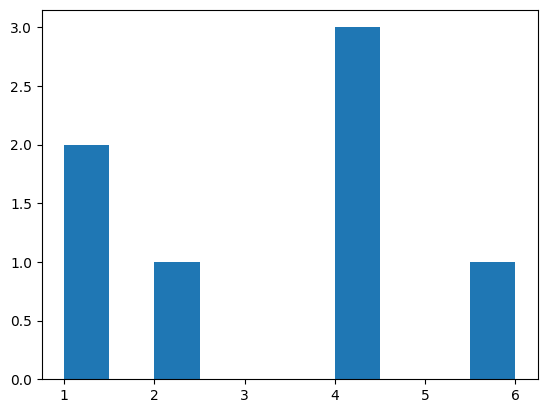

In [ ]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
words = word_tokenize("This is a pretty cool tool!")
word_lengths = [len(w) for w in words]
plt.hist(word_lengths)

In [ ]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

## **Word counts with bag-ofwords**
*Bag of words* es un método muy simple y básico para encontrar temas en un texto.

Para realizar este método, primero se deben crear tokens mediante la tokenización y luego contar todos los tokens que se tiene.

La teoría es que cuanto más frecuente es una palabra o elemento, más central o importante puede ser para el texto.

*Bag of words* puede ser una excelñente manera de determinar las palabras significativas en un texto según la cantidad de veces que se usan.

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
counter = Counter(word_tokenize("""The cat is in the box. The cat likes the box. The box is over the cat"""))
Counter(word_tokenize("""The cat is in the box. The cat likes the box. The box is over the cat"""))

Counter({'The': 3,
         'cat': 3,
         'is': 2,
         'in': 1,
         'the': 3,
         'box': 3,
         '.': 2,
         'likes': 1,
         'over': 1})

In [ ]:
counter.most_common(2)

[('The', 3), ('cat', 3)]

In [ ]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

## Procesado de texto simple
El procesamiento de texto ayuda a mejorar los datos de entrada al realizar el aprendizaje autmático u otros métodos estadísticos. Entre las técnicas de procesamiento más comunes se encuentran:

* Tokenización para la creación de *bag of words*
* Pasar a minúsculas
* Lematización/Stemming, donde se acortan las palabras a sus raíces
* Eliminación de *stopwords* (eliminar signos de puntuación, artículos...)



In [5]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

# Descargar recursos solo si no están ya descargados
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

text = """The cat is in the box. The cat likes the box. The box is over the cat."""
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]

result = Counter(no_stops).most_common(2)
print(result)


[('cat', 3), ('box', 3)]


### Ejercicio

In [ ]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

## Introducción a *gensim*
En esta subsección se comienza a usar una nueva herramienta llamada Gensim. Es una biblioteca de preocesamiento de lenguaje de código abierto. Utiliza modelos académicos para realizar tareas complejas como crear documentos o word embbedings, corpus y realización de identificación de temas y comparación de documentos.

Gensim permite construir corpus y diccionarios usando clases y funciones simples.

Un corpus es un conjunto de textos que se utilizan para ayudar a realizar tareas de procesamiento del lenguaje.

### **¿Qué es un **word vector**?

Un *word embedding* se entrena a partir de un corpus más grande y es una representación multidimensional de una palabra o documento.

Se puede pensar en él como una matriz multidimensional normalmente con pocas características (muchos ceros y algunos unos).

Con estos vectores, podemos ver las relaciones entre las palabras o documentos basados en cán cerca o lejos están y también qué comparaciones similares encontramos.  

Por ejemplo, podríamos ver que la palabra España es a Madrid lo que Italia es a Roma.

El algoritmo de aprendizaje profundo es capaz de destilar este significado en función de cómo se usan esas palabras a lo largo del texto.

## Ejemplo
A continuación, vemos una lista de cadenas que parecen reseñas de películas de ciencia ficción. Vamos a describir el *pipeline* a realizar:

1. Procesamiento: por simplicidad, solo tokenización y minúsculas
2. Creación de un diccionario. Esto creará una asignación con una identificación para cada token.
3. Ahora, podemos representar documentos completos usando solo una lista de sus identificadores de token y con que frecuencia aparecen esos tokens en cada doc.
4. Usando ese diccionario, podemos crear un corpus de Gensim. Esto es un modelo un poco más avanzado que las bag of words creadas anteriormente. Gensim usa un modelo simple que transforma cada documento en bolsa de palabras utilizando los identificadores de token y la frecuencia de cada token en el doc. Lo que devuelve es una lista de listas donde cada elemento de la lista representa un documento. Cada documento está compuesto por una serie de tuplas donde el primer elemento representa el tokenid y el segundo la frecuencia.

In [6]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

my_documents = ['The movie was about a spaceship and aliens.',
                'I really liked the movie!',
                'Awesome action scenes, but boring characters.',
                'The movie was awful! I hate alien films',
                'Space is cool! I liked the movie.',
                'More space films, please!']

tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
dictionary = Dictionary(tokenized_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print(corpus)



{'.': 0, 'a': 1, 'about': 2, 'aliens': 3, 'and': 4, 'movie': 5, 'spaceship': 6, 'the': 7, 'was': 8, '!': 9, 'i': 10, 'liked': 11, 'really': 12, ',': 13, 'action': 14, 'awesome': 15, 'boring': 16, 'but': 17, 'characters': 18, 'scenes': 19, 'alien': 20, 'awful': 21, 'films': 22, 'hate': 23, 'cool': 24, 'is': 25, 'space': 26, 'more': 27, 'please': 28}
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(5, 1), (7, 1), (8, 1), (9, 1), (10, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)], [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]


## Vamos con un ejercicio

In [ ]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])


# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

## **Tf-idf con gensim**
En esta subsección se explica como usar un modelo TFIDF con Gensim. Tf-idf significa *term frequency - inverse document frequency*. Es un modelo de proecsamiento de uso común que ayuda a determinar las palabras más importantes en cada documento del corpus.

La idea detrás de tf-idf es que cada corpus puede tener palabras compartidas que van más allá de simplemente las palabras de tipo *stopword*. Estas *stopwords* son como palabras vacías y por lo tanto, deben eliminarse o reducirse en importancia. Tf idf hace precisamente eso. Tomará textos que compartan un lenguaje común y asegura que las palabras más comunes en todo el corpus no aparecen como palabras clave.

Tf-idf ayuda a que las palabras frecuentes tengan un peso alto y las palabras comunes en todo el corpus tengan un peso bajo.

La fórmula de tf-idf es la siguiente:

\begin{equation}
w_{i,j} = tf_{i,j}  * log(\frac{N}{d_{if}})
\end{equation}

Donde:
* w_i,j  es el peso TF-IDF para el token i en el documento j
* tf_i,j es el número de ocurrencias del token i en el documento j
* df_i es el número de documentos que contienen al token i
* N es el número total de documentos.

Interpretando la fórmula, el peso será bajo si el término no aparece con frecuencia en el documento, por que la variable tf entonces será baja.

Sin embargo, el peso también será bajo si el logaritmo está cerca de cero, lo que significa que la ecuación interna es baja.

Aquí podemos ver si el número total de documentos dividido por el número de documentos que tiene el término es cercano a uno, entonces nuestro logaritmo será cercano a 0.

Por lo tanto, las palabras que aparecen en muchos o en todos los documentos tendrán un peso tf-idf muy bajo.

Por el contrario, si la palabra solo aparece en unos pocos documentos, ese logaritmo devolverá un número mayor.

La forma de construirlo con Gensim es el siguiente:

In [ ]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf[corpus[1]] #acceder al primer documento

## Ejercicio

In [ ]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)


## Reconocimiento de entidades nombradas
*Named Entity Recognition* o NER es una tarea de NLP usada para identificar entidades nombradas importantes en el texto como personas, lugares y organizaciones e incluso pueden ser fechas, estados, obras de arte y otras categorías según las bibliotecas y notación que se use.

NER puede usarse junto con la identificación de temas para determinar importantes elñementos de un texto o responder preguntas básicas del lenguaje.



In [11]:
import nltk

# Descargar recursos necesarios
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Texto de ejemplo
sentence = '''In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''

# Tokenización y etiquetado POS
tokenized_sent = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)

# Imprimir las primeras tres palabras etiquetadas
print(tagged_sent[:3])

# Etiquetado de entidades nombradas (NER)
ner_tree = nltk.ne_chunk(tagged_sent)
print(ner_tree)



[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]
(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)
